# AVIATION INDUSTRY INSIGHTS

Expanding a company into new industries requires market research and the strategic reallocation of resources. In this case, the client want to purchase and operate commercial and private airplanes to diversify their company's portfolio. Specifically, they want to identify the lowest risk aircraft for the company which means they must have a proven track record of safety and reliability. This metric is provable by a long history of few or no incidents and aerodynamic efficiency.

Another factor to consider is whether the aircraft is reliable in varying weather conditions. In addition, their structural design must be professional and have advanced safety features.

A combination of these factors will produce an airworthy craft with low risk factors, enhanced profitability and revenue growth for the company. Moreover, catering to both commercial and private demographics ensures an increased market share by offering a broad range of products and services.

This notebook will analyse the Kaggle Aviation Accident Database & Synopses dataset to extract meaningful insights about aircraft risk and make reliable recommendations for purchase and product diversification.

In [1]:
#Import the necessary packages and libraries to be used in the data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

In [2]:
#load the data into a dataframe for easier analysis and display the first 5 values to see how the data looks like
df = pd.read_csv('AviationData.csv', encoding="latin-1")
df.head()

<ipython-input-2-f38d6f48b90a>:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding="latin-1")


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


## Preliminary Analysis

In [ ]:
#this method displays the total number of columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [ ]:
#check for non-null count data, data type, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

The 'Make','Model','Number of Engines','Engine Type', and 'Aircraft Category' columns would be the output recommended to the client. The 'Make' and 'Model' appear to have very few missing values compared to 'Aircraft.Category.' 

In [ ]:
#find out about summary statistics such as mean and standard deviation
#additionally, find out the numerical value columns to identify which ones can be correlated if need be
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
#find out the total sum of missing values
df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [7]:
#find out if there are any duplicates which may obscure the data analysis leading to false recommendations
df.duplicated().sum()

0

# Preparing the Data
The client is interested in purchasing and operating low risk aircraft. The columns that are most relevant to determining risk appear to be 'Injury.Severity', 'Aircraft.damage','Aircraft.Category','Make', 'Model','Number.of.Engines', 'Engine.Type','Total.Fatal.Injuries','Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', and 'Broad.phase.of.flight.'

In order to find out all the injuries caused by an aircraft, I want to combine the 'Total Fatal Injuries', 'Total Serious Injuries', and 'Total Minor Injuries' columns. Then form visualizations of these injuries compared against the 'Make', 'Model' and 'Engine Type' to make recommendations on the lowest risk these aircrafts may have on the human body.


In [ ]:
#collect the useful columns impacting aircraft risk that will dictate the analysis going forward
df = df[['Injury.Severity','Make', 'Model','Amateur.Built', 'Number.of.Engines', 'Engine.Type','Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight']]

In [ ]:
#present the first five values of this new dataframe
df.head()

,Injury.Severity,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
0,Fatal(2),Stinson,108-3,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,UNK,Cruise
1,Fatal(4),Piper,PA24-180,No,1.0,Reciprocating,4.0,0.0,0.0,0.0,UNK,Unknown
2,Fatal(3),Cessna,172M,No,1.0,Reciprocating,3.0,NaN,NaN,NaN,IMC,Cruise
3,Fatal(2),Rockwell,112,No,1.0,Reciprocating,2.0,0.0,0.0,0.0,IMC,Cruise
4,Fatal(1),Cessna,501,No,NaN,NaN,1.0,2.0,NaN,0.0,VMC,Approach


In [ ]:
#recheck for non-null count, data type, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         87889 non-null  object 
 1   Make                    88826 non-null  object 
 2   Model                   88797 non-null  object 
 3   Amateur.Built           88787 non-null  object 
 4   Number.of.Engines       82805 non-null  float64
 5   Engine.Type             81793 non-null  object 
 6   Total.Fatal.Injuries    77488 non-null  float64
 7   Total.Serious.Injuries  76379 non-null  float64
 8   Total.Minor.Injuries    76956 non-null  float64
 9   Total.Uninjured         82977 non-null  float64
 10  Weather.Condition       84397 non-null  object 
 11  Broad.phase.of.flight   61724 non-null  object 
dtypes: float64(5), object(7)
memory usage: 8.1+ MB


In [ ]:
#create a new dataframe 'df1' from dataframe 'df' and drop missing values from the 'Make' column
df1 = df.dropna(subset=['Make'])

In [ ]:
#check for non-null count
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         87843 non-null  object 
 1   Make                    88826 non-null  object 
 2   Model                   88777 non-null  object 
 3   Amateur.Built           88726 non-null  object 
 4   Number.of.Engines       82791 non-null  float64
 5   Engine.Type             81781 non-null  object 
 6   Total.Fatal.Injuries    77432 non-null  float64
 7   Total.Serious.Injuries  76326 non-null  float64
 8   Total.Minor.Injuries    76904 non-null  float64
 9   Total.Uninjured         82925 non-null  float64
 10  Weather.Condition       84372 non-null  object 
 11  Broad.phase.of.flight   61713 non-null  object 
dtypes: float64(5), object(7)
memory usage: 8.8+ MB


In [ ]:
#use the new dataframe df1 to create dataframe 'df2' with dropped values from the 'Total Serious Injuries' column
df2 = df1.dropna(subset=['Total.Serious.Injuries'])

In [ ]:
#check for non-null count
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 76326 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         75343 non-null  object 
 1   Make                    76326 non-null  object 
 2   Model                   76287 non-null  object 
 3   Amateur.Built           76316 non-null  object 
 4   Number.of.Engines       71397 non-null  float64
 5   Engine.Type             70394 non-null  object 
 6   Total.Fatal.Injuries    74778 non-null  float64
 7   Total.Serious.Injuries  76326 non-null  float64
 8   Total.Minor.Injuries    74786 non-null  float64
 9   Total.Uninjured         74688 non-null  float64
 10  Weather.Condition       72303 non-null  object 
 11  Broad.phase.of.flight   50326 non-null  object 
dtypes: float64(5), object(7)
memory usage: 7.6+ MB


In [ ]:
#create a sample of the 100 top most significant Aircraft makes since these are the popular ones in use
#also makes for easier visualization since utilizing the full dataset of 88889 is difficult
df2['Make'].value_counts().nlargest(100)

Make
Cessna                       18530
Piper                        10093
CESSNA                        4922
Beech                         3567
PIPER                         2841
                             ...  
Wsk Pzl Mielec                  56
Cameron                         55
Schempp-hirth                   54
RAYTHEON AIRCRAFT COMPANY       53
ROCKWELL INTERNATIONAL          53
Name: count, Length: 100, dtype: int64

In [ ]:
#create a new dataframe 'df3' with only the top 100 values from the previous dataframe
df3 = df2.loc[df2['Make'].value_counts().nlargest(100)]
df3

,Injury.Severity,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight
18530,Non-Fatal,Bell,206L-1,No,1.0,Turbo Shaft,0.0,0.0,0.0,1.0,VMC,Takeoff
10093,Non-Fatal,Mcdonnell Douglas,DC-8-71,No,4.0,Turbo Fan,0.0,1.0,2.0,93.0,IMC,Descent
4922,Fatal(1),Beech,35,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,VMC,Go-around
3567,Non-Fatal,Cessna,210,No,1.0,Reciprocating,0.0,0.0,0.0,4.0,VMC,Approach
2841,Non-Fatal,Stinson,108-2,No,1.0,Reciprocating,0.0,1.0,2.0,0.0,VMC,Takeoff
...,...,...,...,...,...,...,...,...,...,...,...,...
56,Non-Fatal,Cessna,TU206G,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Landing
55,Fatal(1),Piper,PA-28-140,No,1.0,Reciprocating,1.0,1.0,0.0,0.0,VMC,Approach
54,Fatal(1),Cessna,172M,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,IMC,Approach
53,Non-Fatal,Curtis,C46,No,2.0,Reciprocating,0.0,0.0,0.0,3.0,VMC,Standing


In [ ]:
#check for non-null values in new dataframe 'df3'
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 18530 to 53
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         100 non-null    object 
 1   Make                    100 non-null    object 
 2   Model                   100 non-null    object 
 3   Amateur.Built           100 non-null    object 
 4   Number.of.Engines       100 non-null    float64
 5   Engine.Type             100 non-null    object 
 6   Total.Fatal.Injuries    100 non-null    float64
 7   Total.Serious.Injuries  100 non-null    float64
 8   Total.Minor.Injuries    100 non-null    float64
 9   Total.Uninjured         100 non-null    float64
 10  Weather.Condition       100 non-null    object 
 11  Broad.phase.of.flight   100 non-null    object 
dtypes: float64(5), object(7)
memory usage: 10.2+ KB


In [19]:
#using .apply() to get a 'Total Injuries' columns
def calculate_total(row):
    return row['Total.Fatal.Injuries'] + row['Total.Serious.Injuries'] + row['Total.Minor.Injuries']

df3['Total Injuries'] = df.apply(calculate_total, axis=1)


In [ ]:
#ascertain 'Total Injuries' column has been added to the dataframe
df3

,Injury.Severity,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total Injuries
18530,Non-Fatal,Bell,206L-1,No,1.0,Turbo Shaft,0.0,0.0,0.0,1.0,VMC,Takeoff,0.0
10093,Non-Fatal,Mcdonnell Douglas,DC-8-71,No,4.0,Turbo Fan,0.0,1.0,2.0,93.0,IMC,Descent,3.0
4922,Fatal(1),Beech,35,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,VMC,Go-around,1.0
3567,Non-Fatal,Cessna,210,No,1.0,Reciprocating,0.0,0.0,0.0,4.0,VMC,Approach,0.0
2841,Non-Fatal,Stinson,108-2,No,1.0,Reciprocating,0.0,1.0,2.0,0.0,VMC,Takeoff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Non-Fatal,Cessna,TU206G,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Landing,0.0
55,Fatal(1),Piper,PA-28-140,No,1.0,Reciprocating,1.0,1.0,0.0,0.0,VMC,Approach,2.0
54,Fatal(1),Cessna,172M,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,IMC,Approach,1.0
53,Non-Fatal,Curtis,C46,No,2.0,Reciprocating,0.0,0.0,0.0,3.0,VMC,Standing,0.0


In [ ]:
#reset the index to start from 0
df3.reset_index(inplace = True, drop = True)

In [ ]:
#check dataframe for new index column
df3

,Injury.Severity,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Total Injuries
0,Non-Fatal,Bell,206L-1,No,1.0,Turbo Shaft,0.0,0.0,0.0,1.0,VMC,Takeoff,0.0
1,Non-Fatal,Mcdonnell Douglas,DC-8-71,No,4.0,Turbo Fan,0.0,1.0,2.0,93.0,IMC,Descent,3.0
2,Fatal(1),Beech,35,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,VMC,Go-around,1.0
3,Non-Fatal,Cessna,210,No,1.0,Reciprocating,0.0,0.0,0.0,4.0,VMC,Approach,0.0
4,Non-Fatal,Stinson,108-2,No,1.0,Reciprocating,0.0,1.0,2.0,0.0,VMC,Takeoff,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Non-Fatal,Cessna,TU206G,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC,Landing,0.0
96,Fatal(1),Piper,PA-28-140,No,1.0,Reciprocating,1.0,1.0,0.0,0.0,VMC,Approach,2.0
97,Fatal(1),Cessna,172M,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,IMC,Approach,1.0
98,Non-Fatal,Curtis,C46,No,2.0,Reciprocating,0.0,0.0,0.0,3.0,VMC,Standing,0.0


# Data Visualization

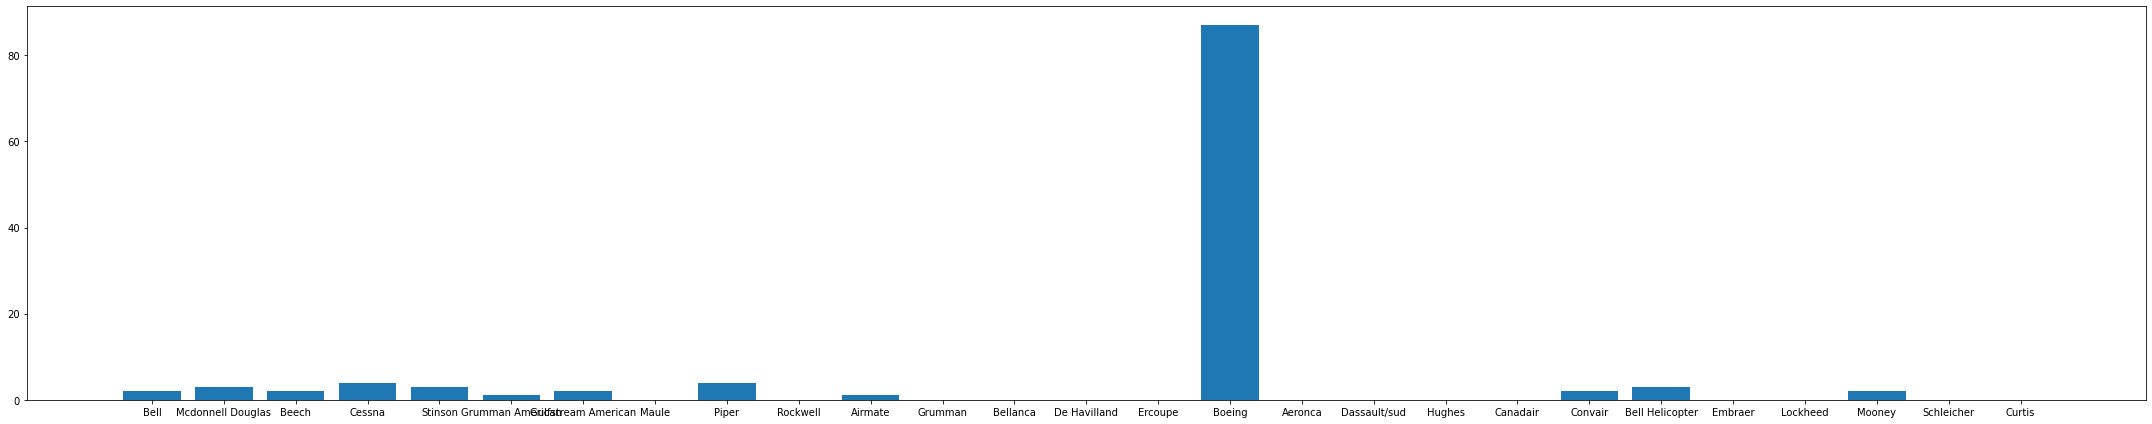

In [23]:
#Barplot
plt.figure(figsize=(30,6))
y =df3['Total Injuries']
x = df3['Make']

plt.bar(x,y)
plt.tight_layout()

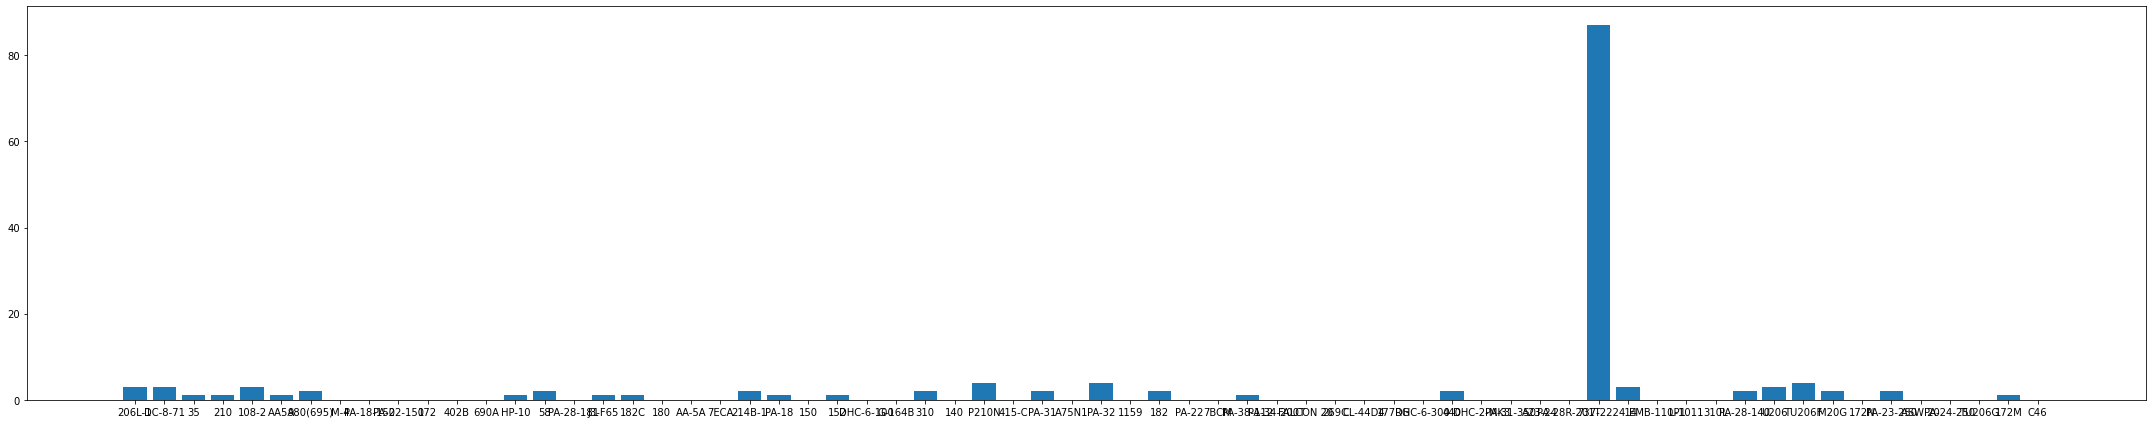

In [24]:
plt.figure(figsize=(30,6))
y =df3['Total Injuries']
x = df3['Model']

plt.bar(x,y)
plt.tight_layout()

<BarContainer object of 100 artists>

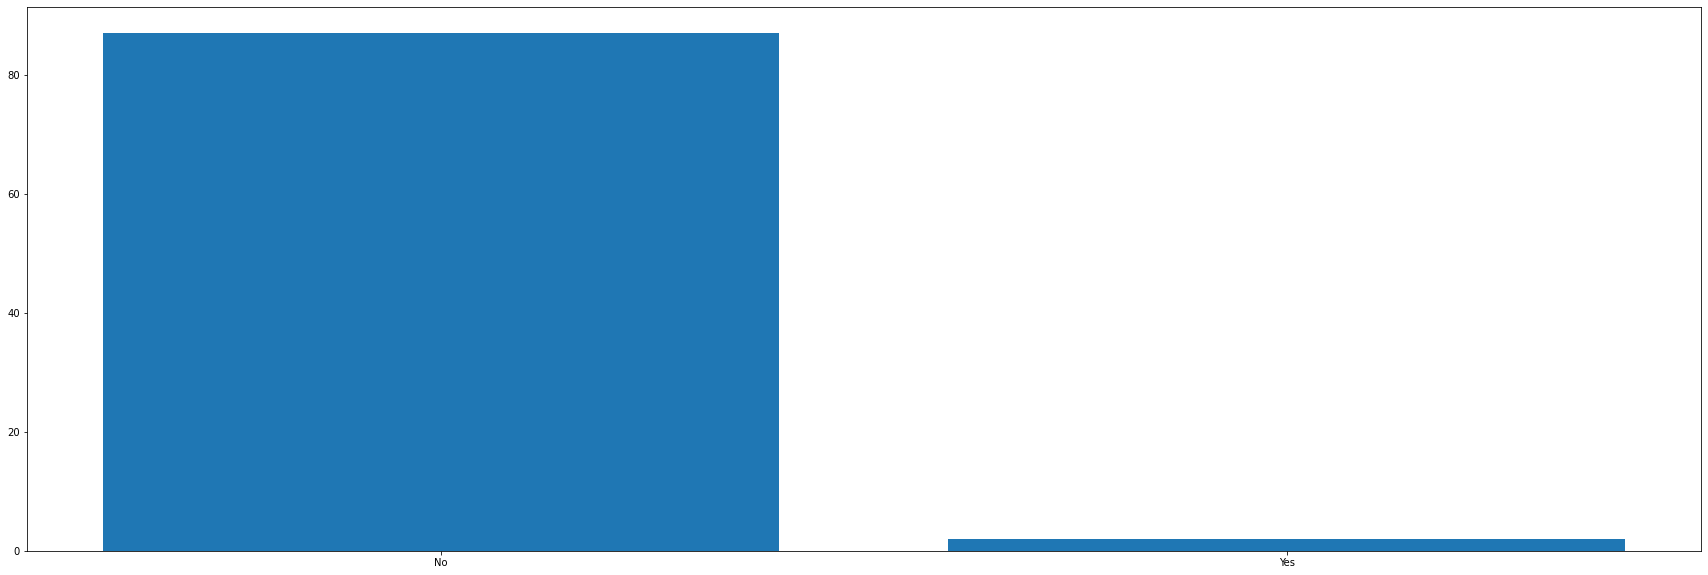

In [25]:
plt.figure(figsize=(30,10))
y =df3['Total Injuries']
x = df3['Amateur.Built']

plt.bar(x,y)


<BarContainer object of 100 artists>

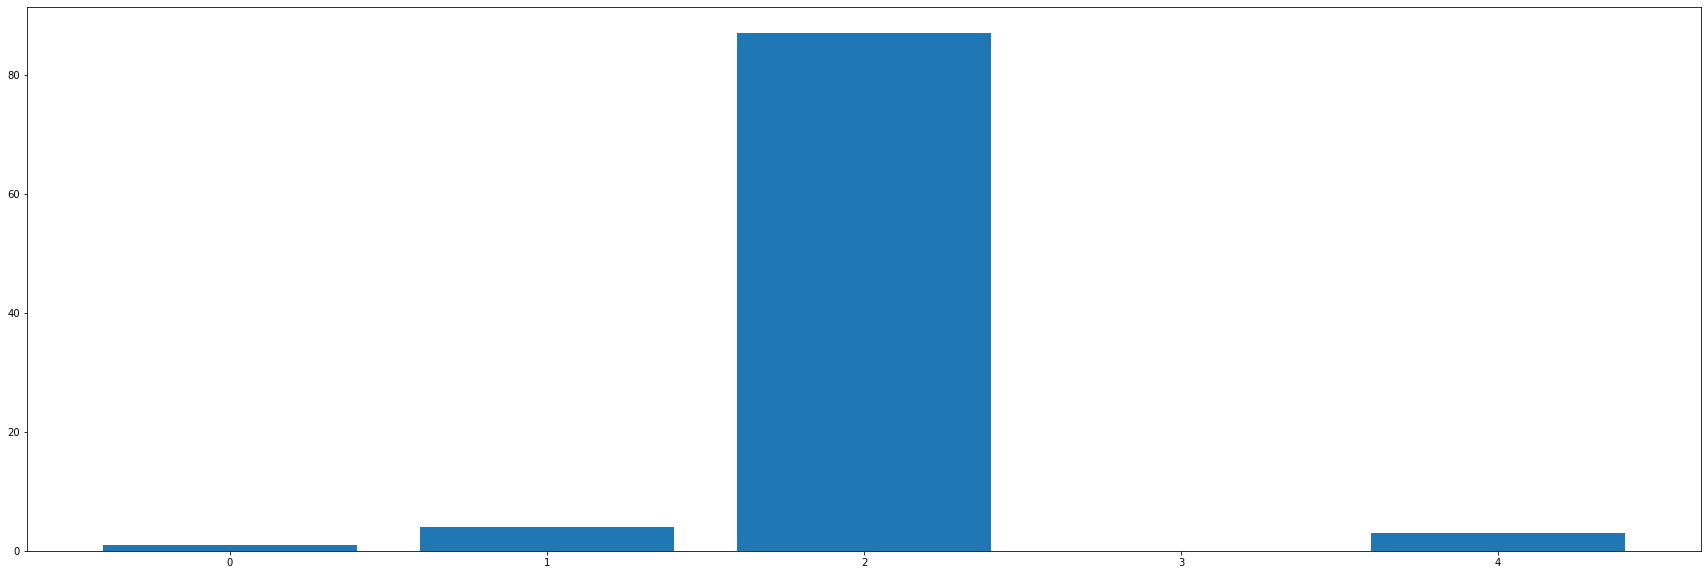

In [26]:
plt.figure(figsize=(30,10))
y = df3['Total Injuries']
x = df3['Number.of.Engines']

plt.bar(x,y)

<BarContainer object of 100 artists>

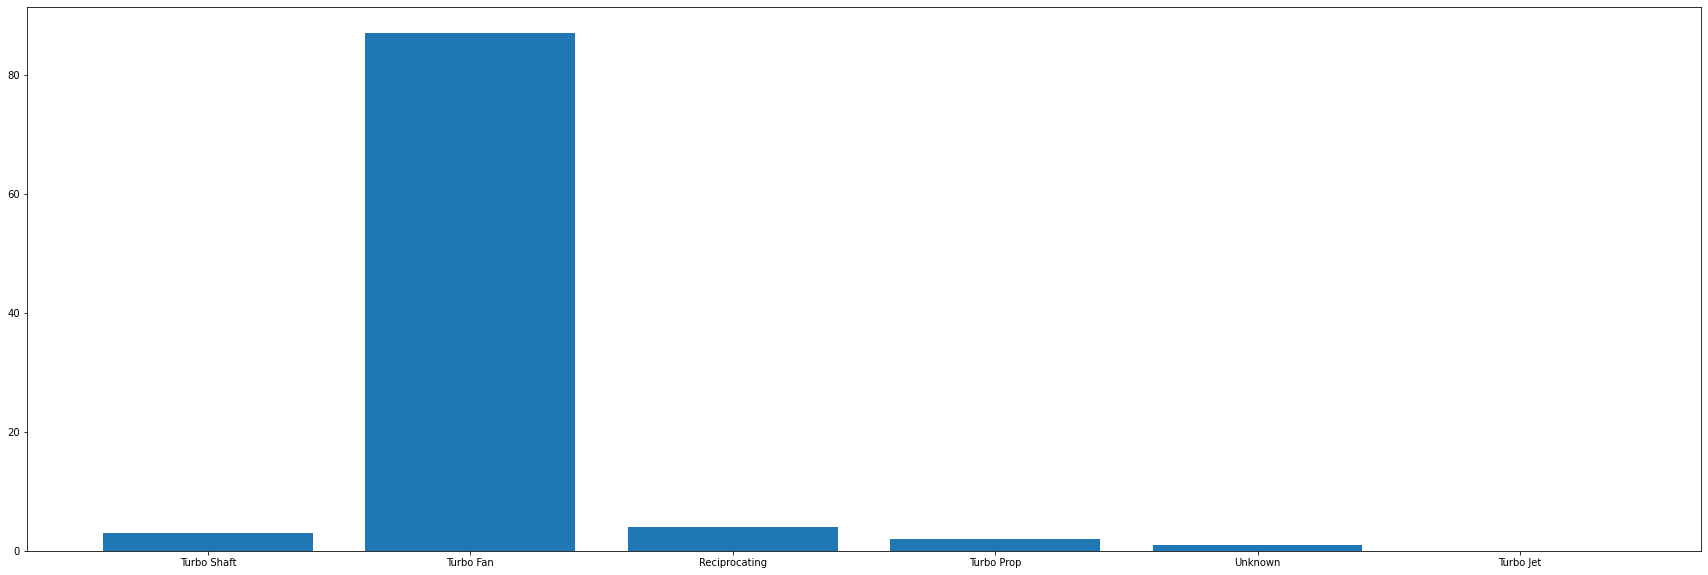

In [27]:
plt.figure(figsize=(30,10))
y =df3['Total Injuries']
x = df3['Engine.Type']

plt.bar(x,y)

In [30]:
df3['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal    78
Fatal(1)     10
Incident      6
Fatal(2)      3
Fatal(78)     2
Fatal(4)      1
Name: count, dtype: int64

In [ ]:
df3['Weather.Condition'].value_counts()
# VMC - Visual Meteorological Conditions
# IMC - Instrument Meteorological Conditions
# UNK is a code for Unalakleet Airport


Weather.Condition
VMC    81
IMC    14
UNK     5
Name: count, dtype: int64